In [17]:
import json
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
from typing import Tuple
import sys
sys.path.append('..')
from ultratrees import *

In [24]:
def build_phylogenetic_tree(
    dist_matrix,
    title: str = "",
    method: str = "average",
    plot: bool = True
) -> Tuple[np.ndarray, List[str]]:
    """
    Given an ultrametric distance DataFrame, perform UPGMA
    (average linkage) clustering to reconstruct a phylogenetic tree.
    Returns the linkage matrix Z and the leaf order. Optionally plots.
    """
    condensed = squareform(dist_matrix)
    Z = linkage(condensed, method=method)
    if plot:
        fig, ax = plt.subplots(figsize=(8, 4))
        dendrogram(Z, ax=ax)
        ax.set_title("Hierarchy Tree for " + title)
        plt.tight_layout()
        plt.show()
    return Z, dist_matrix

In [47]:
input_file1  = "../../datasets/wordnet/files/wordnet_noun_list_hierarchies.json"
with open(input_file1, "r", encoding="utf-8") as f:
    # word_hierarchies is a list of dicts
    word_hierarchies = json.load(f)

In [ ]:
tree1_str = word_hierarchies[0]['hierarchy']
tree2_str = word_hierarchies[1]['hierarchy']
print("Tree 1:", tree1_str)
print("Tree 2:", tree2_str)

Tree 1: {'entity': {'abstraction': {'measure': {'definite_quantity': {'number': {'integer': {'digit': {'zero.n.02': {}}}}}}}}}
Tree 2: {'entity': {'abstraction': {'measure': {'definite_quantity': {'number': {'integer': {'digit': {'one.n.01': {}}}}}}}}}


In [51]:
# 1) Extract leaf paths
tree1_leaf_paths = extract_leaf_paths(tree1_str)
print("tree1 - Leaf paths:\n", tree1_leaf_paths)

# 2) Compute ultrametric distance matrix
tree1_distance_matrix = ultrametric_distance_matrix(tree1_leaf_paths)
print("tree1 - Ultrametric distance matrix:\n", tree1_distance_matrix)

# 3) Build & plot the phylogenetic tree
Z, leafs = build_phylogenetic_tree(tree1_distance_matrix, "tree1")

tree1 - Leaf paths:
 {'zero.n.02': ['entity', 'abstraction', 'measure', 'definite_quantity', 'number', 'integer', 'digit', 'zero.n.02']}
tree1 - Ultrametric distance matrix:
 [[0.]]


ValueError: The number of observations cannot be determined on an empty distance matrix.

Ultrametric distance matrix:
                 privilege.n.01  abstraction
privilege.n.01             0.0          1.0
abstraction                1.0          0.0


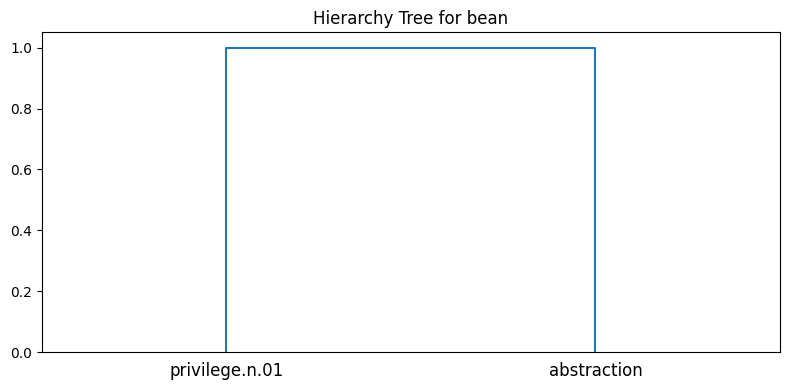

In [ ]:
hierarchy_json = """{'entity': {'abstraction': {'attribute': {'quality': {'asset': {'advantage': {'privilege.n.01': {}}}}}, 'psychological_feature': {'cognition': {'content': {'idea': {'concept': {'abstraction': {}}}}}}}}}"""
hierarchy_json = hierarchy_json.replace("\'", "\"")
bean_hierarchy = json.loads(hierarchy_json)
# 1) Extract leaf paths for bean
leaf_paths_bean = extract_leaf_paths(bean_hierarchy)
# 2) Compute ultrametric distance matrix
dist_matrix_bean = ultrametric_distance_matrix(leaf_paths_bean)
print("Ultrametric distance matrix:\n", dist_matrix_bean)
# 3) Build & plot the phylogenetic tree
Z, leafs = build_phylogenetic_tree(dist_matrix_bean, "bean")

Ultrametric distance matrix:
       pea1  pea2
pea1   0.0   1.0
pea2   1.0   0.0


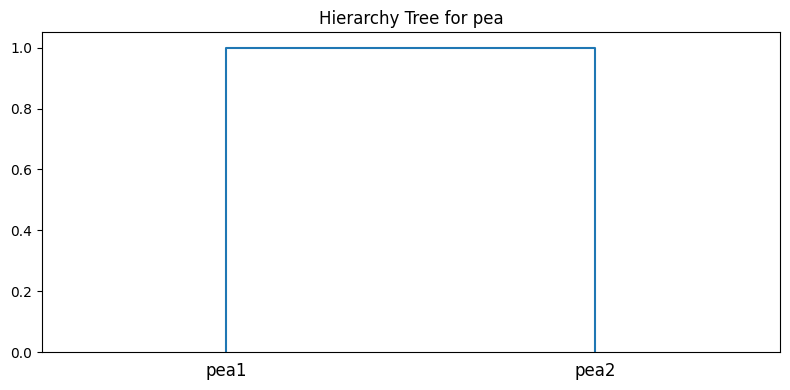

Ultrametric distance matrix:
        bean1  bean2
bean1    0.0    1.0
bean2    1.0    0.0


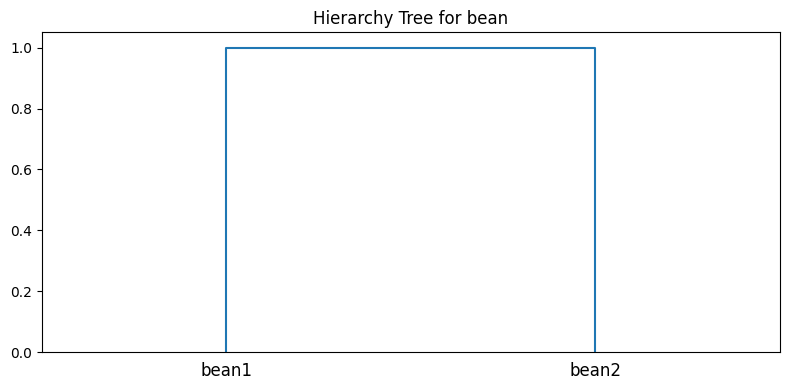

In [ ]:
pea_chatgpt_tree = {
    "entity": {
        "physical_entity": {
            "object": {
                "whole": {
                    "plant": {
                        "legume": {
                            "pea1": {}
                        }
                    }
                }
            },
            "food": {
                "plant_product": {
                    "vegetable": {
                        "pea2": {}
                    }
                }
            }
        }
    }
}
bean_chatgpt_tree = {
    "entity": {
        "physical_entity": {
            "object": {
                "whole": {
                    "plant": {
                        "legume": {
                            "bean1": {}
                        }
                    }
                }
            },
            "food": {
                "plant_product": {
                    "vegetable": {
                        "bean2": {}
                    }
                }
            }
        }
    }
}

leaf_paths_pea_chatgpt = extract_leaf_paths(pea_chatgpt_tree)
dist_matrix_pea_chatgpt = ultrametric_distance_matrix(leaf_paths_pea_chatgpt)
print("Ultrametric distance matrix:\n", dist_matrix_pea_chatgpt)
Z, leafs = build_phylogenetic_tree(dist_matrix_pea_chatgpt, "pea")

leaf_paths_bean_chatgpt = extract_leaf_paths(bean_chatgpt_tree)
dist_matrix_bean_chatgpt = ultrametric_distance_matrix(leaf_paths_bean_chatgpt)
print("Ultrametric distance matrix:\n", dist_matrix_bean_chatgpt)
Z, leafs = build_phylogenetic_tree(dist_matrix_bean_chatgpt, "bean")